In [1]:
pip install matplotlib --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas --quiet

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn --quiet

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
file_path = 'C:\\Users\\Ojo Ridwan\\Downloads\\customer_booking (1).csv'
df = pd.read_csv(file_path, encoding="ISO-8859-1")

df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [8]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [9]:
df['flight_day'].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [10]:
mapping = {
    'Mon': 1,
    'Tue': 2,
    'Wed': 3,
    'Thu': 4,
    'Fri': 5,
    'Sat': 6,
    'Sun': 7,
}

df['flight_day'] = df['flight_day'].map(mapping)

df['flight_day'].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [11]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


### Outliers

We notice there are some outliers in the overall data, especially in columns like 'num_passengers', 'purchase_lead', and 'length_of_stay'. Let visualize the whole data using boxplot to see the outliers better

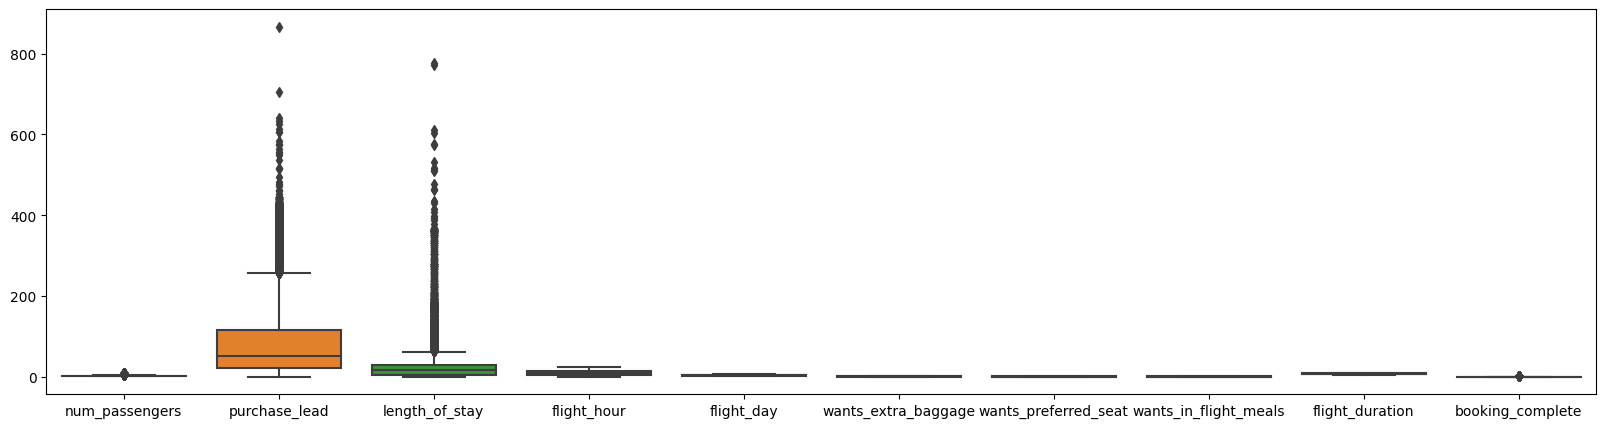

In [12]:
plt.figure(figsize = (20, 5))
sns.boxplot(data = df)
plt.show()

In [13]:
# Replacing the outliers with the median using the interquartile range

column_list = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration']


for feature in column_list:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    
    lower_limit = Q1 - 1.5 * IQR
    
    upper_limit = Q3 + 1.5 * IQR
  
    
    median = df[feature].median()
    
    
    df[feature] = np.where(df[feature]< lower_limit, median,df[feature])
    df[feature] = np.where(df[feature]> upper_limit, median,df[feature])

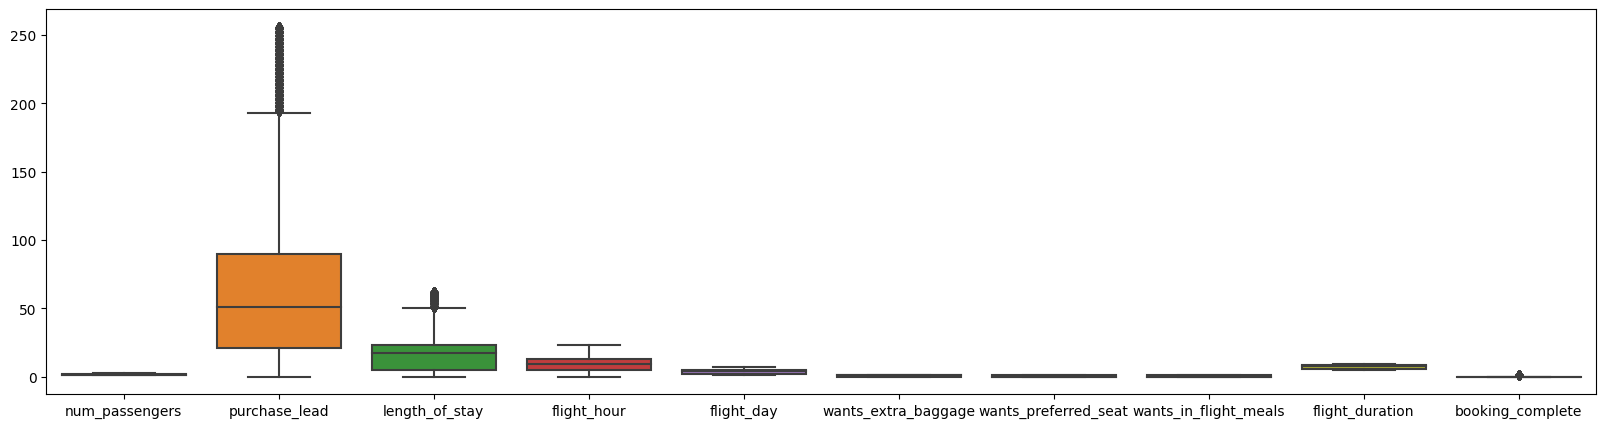

In [14]:
# Checking for the outliers again

plt.figure(figsize = (20, 5))
sns.boxplot(data = df)
plt.show()

In [15]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.00000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.373720,65.80848,15.878960,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,0.593043,60.15311,13.501474,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.00000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.00000,5.000000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.00000,17.000000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,90.00000,23.000000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,3.000000,256.00000,62.000000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


### Correlation Matrix

In [16]:
corr = df.select_dtypes(exclude=object).corr()

corr

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,0.150551,-0.096334,0.012464,0.013551,0.093164,0.043474,0.010940,-0.034435,0.022536
purchase_lead,0.150551,1.000000,0.034589,0.030490,0.029664,0.020892,0.014663,0.014664,0.072161,-0.028453
length_of_stay,-0.096334,0.034589,1.000000,-0.037611,0.003520,0.232762,0.011302,0.103878,0.176257,-0.094614
flight_hour,0.012464,0.030490,-0.037611,1.000000,0.024086,-0.011434,0.012171,0.013014,-0.002101,0.007127
flight_day,0.013551,0.029664,0.003520,0.024086,1.000000,-0.002503,0.005392,0.009281,0.018434,-0.006986
wants_extra_baggage,0.093164,0.020892,0.232762,-0.011434,-0.002503,1.000000,0.207669,0.216470,0.057054,0.068139
wants_preferred_seat,0.043474,0.014663,0.011302,0.012171,0.005392,0.207669,1.000000,0.315088,0.101289,0.050116
wants_in_flight_meals,0.010940,0.014664,0.103878,0.013014,0.009281,0.216470,0.315088,1.000000,0.154312,0.026511
flight_duration,-0.034435,0.072161,0.176257,-0.002101,0.018434,0.057054,0.101289,0.154312,1.000000,-0.106266
booking_complete,0.022536,-0.028453,-0.094614,0.007127,-0.006986,0.068139,0.050116,0.026511,-0.106266,1.000000


<Axes: >

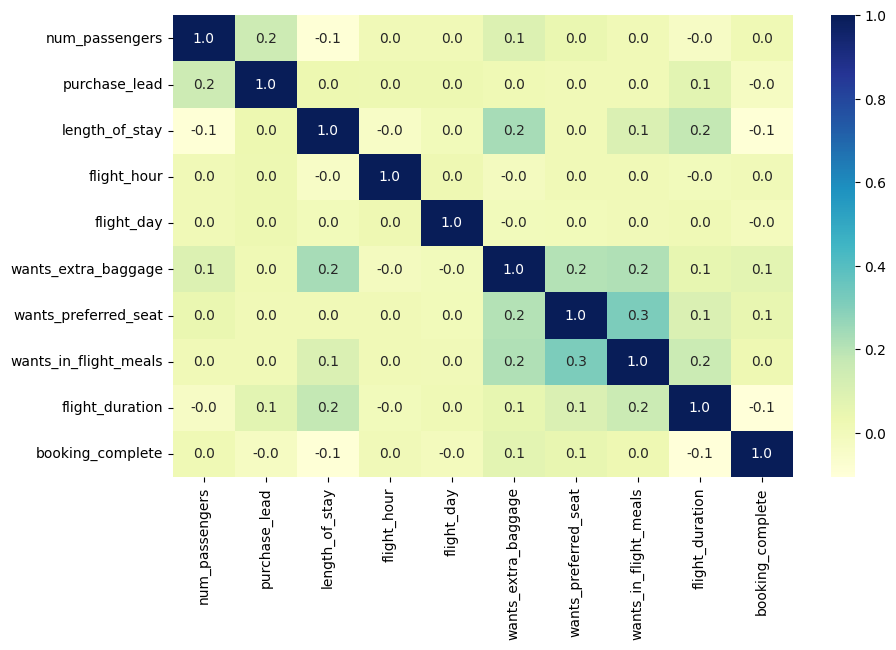

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".1f")

### Medium of Sales

In [18]:
per_internet = df.sales_channel.value_counts().values[0] / df.sales_channel.count() *100
per_mobile = df.sales_channel.value_counts().values[1] / df.sales_channel.count() *100

In [19]:
print(f"Number of bookings done through internet: {per_internet} %")
print(f"Number of bookings done through mobile: {per_mobile} %")

Number of bookings done through internet: 88.764 %
Number of bookings done through mobile: 11.236 %


### Trip Type

In [20]:
df.trip_type.value_counts()

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

In [21]:
per_roundtrip = df.trip_type.value_counts().values[0]  / df.trip_type.count() *100
per_oneway = df.trip_type.value_counts().values[1]  / df.trip_type.count() *100
per_circletrip = df.trip_type.value_counts().values[2]  / df.trip_type.count() *100

In [22]:
print(f"Number of trips that were round trip: {per_roundtrip} %")
print(f"Number of trips that were one way: {per_oneway} %")
print(f"Number of trips that were circle trip: {per_circletrip} %")

Number of trips that were round trip: 98.994 %
Number of trips that were one way: 0.774 %
Number of trips that were circle trip: 0.232 %


### Purchase lead

<Axes: xlabel='purchase_lead', ylabel='Count'>

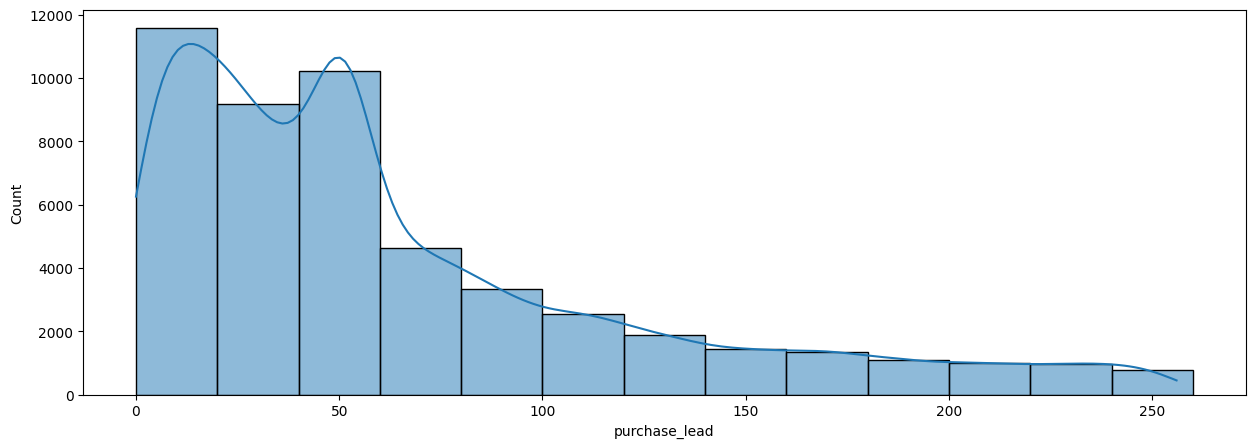

In [23]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="purchase_lead", binwidth=20,kde=True)

### Lenght of stay

<Axes: xlabel='length_of_stay', ylabel='Count'>

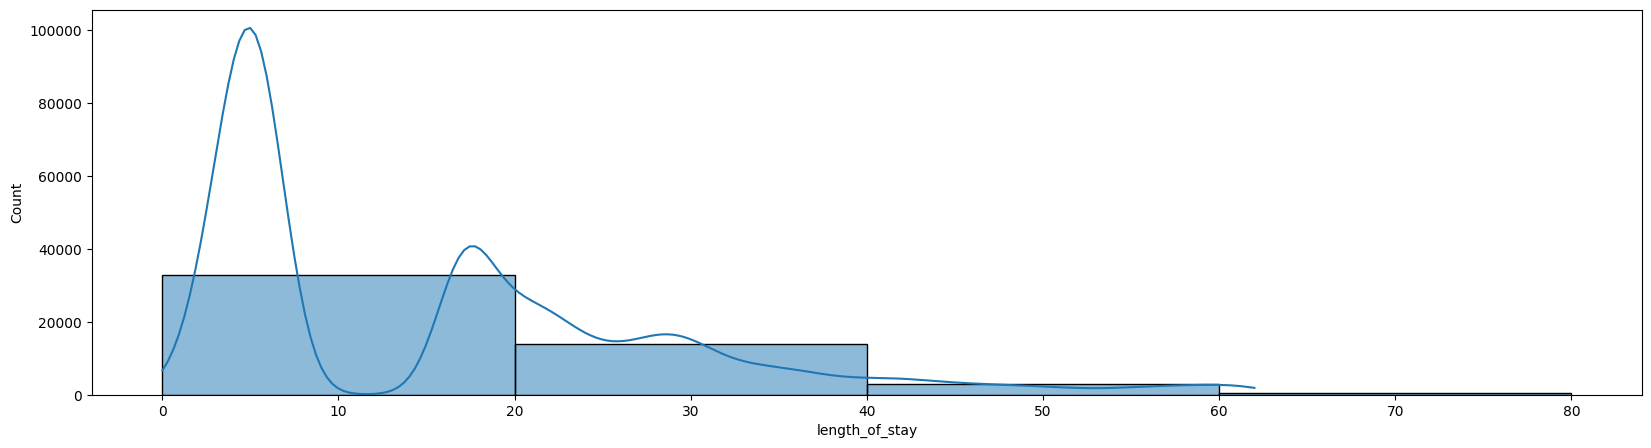

In [24]:
plt.figure(figsize=(20, 5))
sns.histplot(data = df, x = "length_of_stay", binwidth = 20, kde=True)

### Flight Day

In [25]:
df.flight_day.value_counts()

flight_day
1    8102
3    7674
2    7673
4    7424
5    6761
7    6554
6    5812
Name: count, dtype: int64

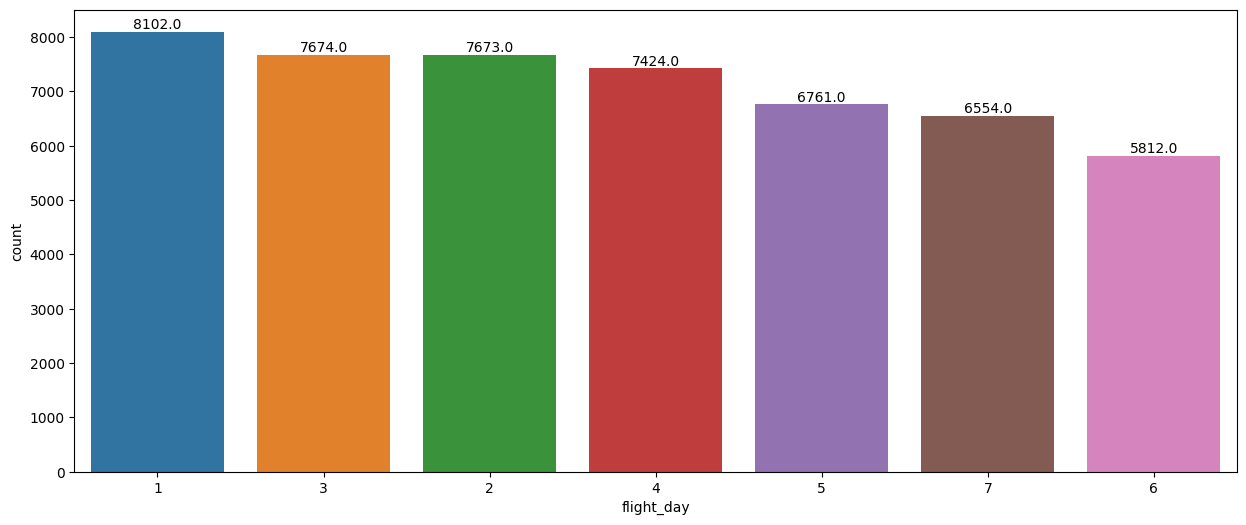

In [26]:
# No. of flights on each day of the week

plt.figure(figsize=(15,6))
ax = sns.countplot(x = "flight_day", data=df, order=df["flight_day"].value_counts().index)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.show()

`Observation:` The most flight day happens on Mondays while Saturdays have the least flight day

### Flight Hour

In [27]:
df.flight_hour.value_counts()

flight_hour
8.0     3165
12.0    3163
9.0     3132
7.0     3126
11.0    3110
13.0    3101
10.0    3085
6.0     3050
5.0     2851
4.0     2843
14.0    2833
3.0     2655
2.0     2642
15.0    2234
1.0     2089
16.0    1557
0.0     1539
23.0     986
17.0     861
22.0     579
18.0     439
21.0     389
19.0     295
20.0     276
Name: count, dtype: int64

The most frequent "flight_hour" is 8.0 hours while least frequent is 20.0 hours

In [28]:
# Booking origin with the most hours of flight

origin_with_most_flight_hours = df[df["flight_hour"] == 20.0].groupby("flight_hour")["booking_origin"].value_counts()

origin_with_most_flight_hours[:20]

flight_hour  booking_origin      
20.0         Australia               108
             New Zealand              25
             Japan                    18
             Malaysia                 15
             Thailand                 13
             South Korea              11
             China                    11
             India                    11
             Indonesia                 8
             United Kingdom            8
             Taiwan                    7
             United States             7
             United Arab Emirates      4
             Singapore                 4
             Germany                   3
             Philippines               3
             Iran                      2
             Macau                     2
             Argentina                 2
             Canada                    2
Name: count, dtype: int64

In [29]:
# Booking origin with the least hours of flight

origin_with_least_flight_hours = df[df["flight_hour"] == 8.0].groupby("flight_hour")["booking_origin"].value_counts()

origin_with_least_flight_hours[:20]

flight_hour  booking_origin
8.0          Australia         1124
             Malaysia           538
             South Korea        264
             China              201
             Japan              198
             Indonesia          177
             Thailand           131
             Taiwan             121
             New Zealand         98
             India               88
             Singapore           58
             Vietnam             28
             Macau               19
             Philippines         16
             Hong Kong           13
             United States       13
             Brunei              12
             United Kingdom       9
             Cambodia             7
             Russia               5
Name: count, dtype: int64

### Booking Origin

In [30]:
df["booking_origin"].value_counts()

booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

Text(0, 0.5, 'Number of bookings')

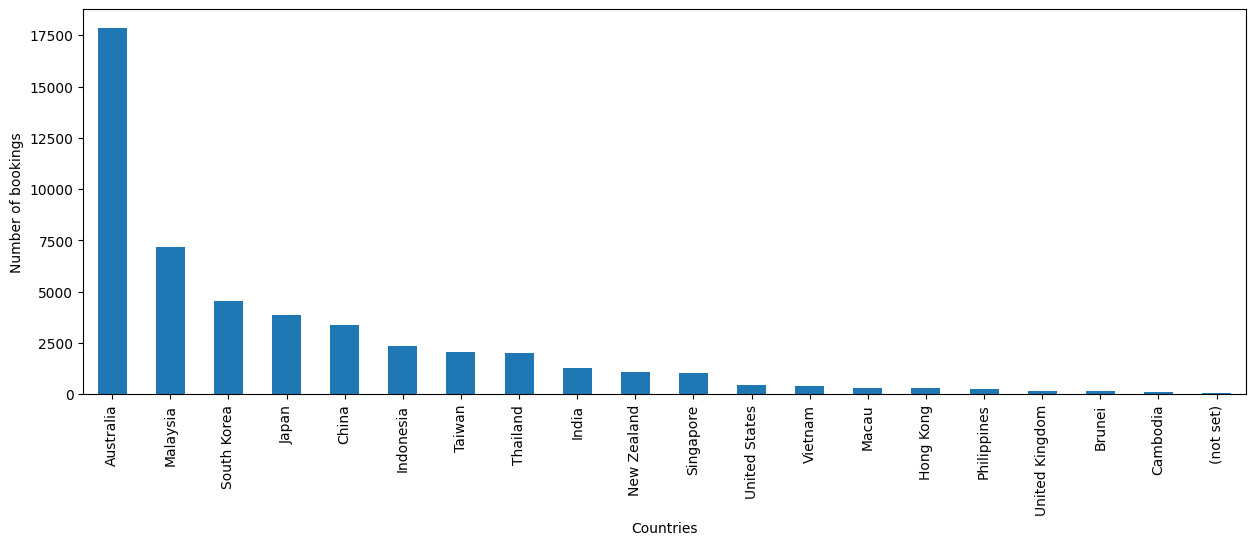

In [31]:
plt.figure(figsize=(15,5))
ax = df.booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of bookings")

`Observation`: The chart above illustrates the countries from which travelers submitted the highest number of booking applications.

Text(0, 0.5, 'Number of complete bookings')

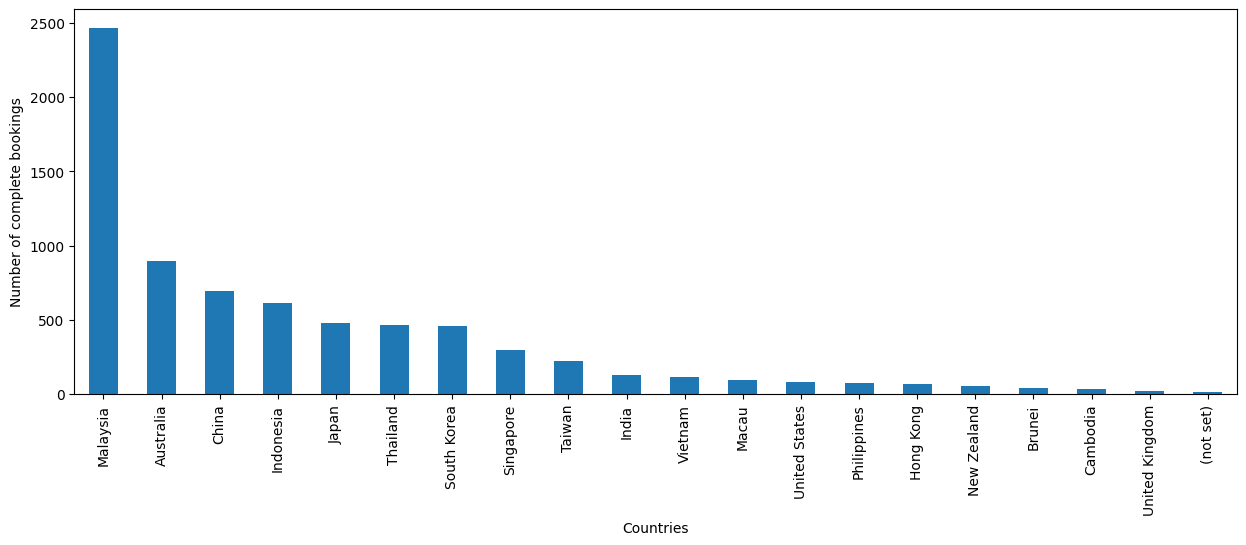

In [32]:
plt.figure(figsize=(15,5))
ax = df[df.booking_complete ==1].booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of complete bookings")

`Observation`: The chart above illustrates the countries that had their booking completed.

### Booking Complete

In [33]:
df.booking_complete.value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [34]:
# Successful bookings are the ones with 1 while unsuccessful ones are the ones with 0

successful_booking = df["booking_complete"] == 1
unsuccessful_booking = df["booking_complete"] == 0

In [35]:
# Percentage of successful_booking

per_successful_booking = (successful_booking.sum()) / (df["booking_complete"].count()) * 100

print(f"Out of 50000 booking entries only {round(per_successful_booking,2)} % bookings were successful.")

Out of 50000 booking entries only 14.96 % bookings were successful.


## Models

### OneHotCoder

In [36]:
pip install scikit-learn --quiet

Note: you may need to restart the kernel to use updated packages.


In [37]:
from sklearn.preprocessing import OneHotEncoder


#create instance of one hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#one hot encode Sales Channel
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
df_final = df.join(encoder_df)

#one hot encode trip type
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTRip', 1:'OneWayTrip',2:'CircleTrip'})
df_final = df_final.join(encoder_df)


In [38]:
df_final.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip
0,2.0,Internet,RoundTrip,51.0,19.0,7.0,6,AKLDEL,New Zealand,1.0,0.0,0.0,5.52,0,1.0,0.0,0.0,0.0,1.0
1,1.0,Internet,RoundTrip,112.0,20.0,3.0,6,AKLDEL,New Zealand,0.0,0.0,0.0,5.52,0,1.0,0.0,0.0,0.0,1.0
2,2.0,Internet,RoundTrip,243.0,22.0,17.0,3,AKLDEL,India,1.0,1.0,0.0,5.52,0,1.0,0.0,0.0,0.0,1.0
3,1.0,Internet,RoundTrip,96.0,31.0,4.0,6,AKLDEL,New Zealand,0.0,0.0,1.0,5.52,0,1.0,0.0,0.0,0.0,1.0
4,2.0,Internet,RoundTrip,68.0,22.0,15.0,3,AKLDEL,India,1.0,0.0,1.0,5.52,0,1.0,0.0,0.0,0.0,1.0


In [39]:
df_numerical = df_final.select_dtypes(exclude=object)

df_numerical.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip
0,2.0,51.0,19.0,7.0,6,1.0,0.0,0.0,5.52,0,1.0,0.0,0.0,0.0,1.0
1,1.0,112.0,20.0,3.0,6,0.0,0.0,0.0,5.52,0,1.0,0.0,0.0,0.0,1.0
2,2.0,243.0,22.0,17.0,3,1.0,1.0,0.0,5.52,0,1.0,0.0,0.0,0.0,1.0
3,1.0,96.0,31.0,4.0,6,0.0,0.0,1.0,5.52,0,1.0,0.0,0.0,0.0,1.0
4,2.0,68.0,22.0,15.0,3,1.0,0.0,1.0,5.52,0,1.0,0.0,0.0,0.0,1.0


In [45]:
label = df_numerical["booking_complete"]

In [48]:
df_numerical = df_numerical.drop('booking_complete', axis=1)

In [51]:
from sklearn.preprocessing import StandardScaler

#create a standard scaler object
scaler = StandardScaler()

#fit and transform the data
scaled_df = scaler.fit_transform(df_numerical)

In [52]:
scaled_df = pd.DataFrame(scaled_df, columns = df_numerical.columns)

scaled_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip
0,1.056055,-0.246182,0.231165,-0.381764,1.096754,0.703747,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808
1,-0.630179,0.767907,0.305232,-1.120780,1.096754,-1.420965,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808
2,1.056055,2.945705,0.453365,1.465775,-0.408687,0.703747,1.538654,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808
3,-0.630179,0.501916,1.119966,-0.936026,1.096754,-1.420965,-0.649919,1.158082,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808
4,1.056055,0.036433,0.453365,1.096267,-0.408687,0.703747,-0.649919,1.158082,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.056055,-0.645168,-0.731702,-0.012257,1.096754,0.703747,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808
49996,-0.630179,0.751282,-0.731702,-0.936026,1.598567,-1.420965,-0.649919,-0.863497,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808
49997,-0.630179,-0.695041,-0.731702,2.389544,1.096754,-1.420965,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808
49998,-0.630179,-0.844661,-0.731702,0.357251,-1.412314,0.703747,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808


### Splitting Data into Train and Test

Now let's split the dataset into train and test sets. The test sets will be 20% of the total dataset

In [53]:

scaled_df['label']  = label



scaled_df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,1.056055,-0.246182,0.231165,-0.381764,1.096754,0.703747,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
1,-0.630179,0.767907,0.305232,-1.120780,1.096754,-1.420965,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
2,1.056055,2.945705,0.453365,1.465775,-0.408687,0.703747,1.538654,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
3,-0.630179,0.501916,1.119966,-0.936026,1.096754,-1.420965,-0.649919,1.158082,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
4,1.056055,0.036433,0.453365,1.096267,-0.408687,0.703747,-0.649919,1.158082,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0


In [54]:
from sklearn.model_selection import train_test_split

X = scaled_df.iloc[:,:-1]
y = scaled_df['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [56]:
pip install yellowbrick --quiet

Note: you may need to restart the kernel to use updated packages.


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

In [59]:
"""
    Create functions to fit and predict the values of whether customer would complete the booking.
    Also functions with metrics to evaluate the model prediction.
"""

def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)

def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

## Random Forest Classifier

In [60]:
#create an instance of the classifier and fit the training data

clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

### Checking Training accuracy

In [61]:
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)
set(y_pred_train)

#f1 score for training data
f1 = round(f1_score(y_train, y_pred_train),2) 

#accuracy score for training data
acc = round(accuracy_score(y_train, y_pred_train),2) 

#precision score for training data
pre = round(precision_score(y_train, y_pred_train),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.93, 1.0 and 0.7 respectively


0.8529

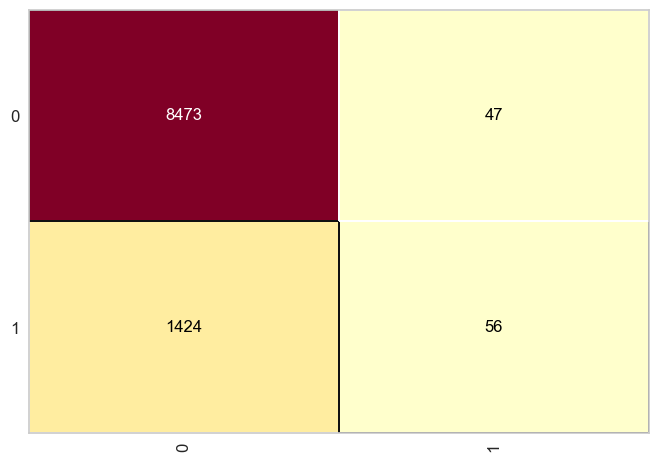

In [62]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

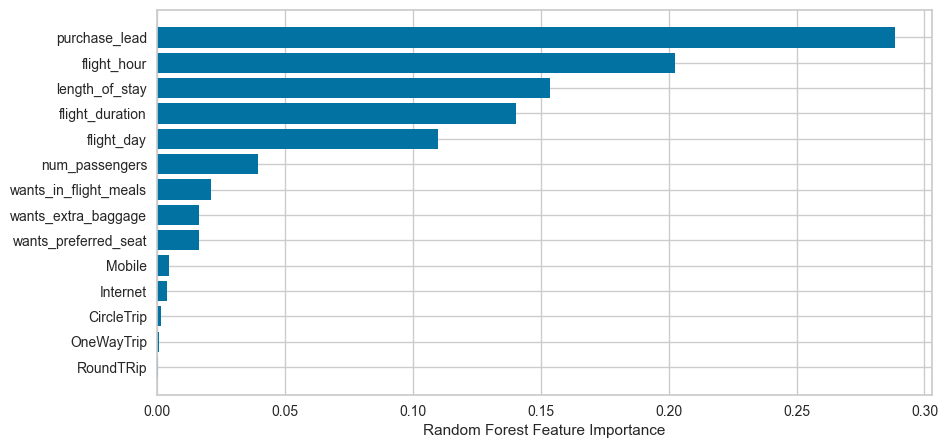

In [63]:
plt.figure(figsize=(10,5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

A significant issue contributing to the lower F1 score is the presence of class imbalance in the dataset. The instances classified as 0 significantly outnumber those classified as 1. To address this, we could consider reducing the number of instances classified as 0, bringing them closer in quantity to the number of instances classified as 1.

### Balancing the Dataset

In [66]:
scaled_df.label.value_counts()

label
0    42522
1     7478
Name: count, dtype: int64

In [68]:
#create a dataframe having all labels 0 with 10000 samples

scaled_df_0 = scaled_df[scaled_df.label == 0].sample(n=8000)

In [69]:
#concatenate the two dataframee, one havng all labels 0 and other having all labels as 1

scaled_df_new = pd.concat([scaled_df[scaled_df.label==1], scaled_df_0], ignore_index=True)

In [72]:
#shuffle the dataframe rows

scaled_df_new = scaled_df_new.sample(frac = 1).reset_index(drop=True)

scaled_df_new.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,-0.630179,-0.063314,-0.953902,0.542005,0.594940,-1.420965,-0.649919,-0.863497,1.037139,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
1,-0.630179,-0.894534,0.601499,-0.936026,0.594940,0.703747,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
2,-0.630179,-0.828037,2.453167,-0.012257,-0.408687,0.703747,1.538654,1.158082,-1.688589,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
3,-0.630179,-0.994281,-0.805769,0.542005,-0.408687,0.703747,-0.649919,1.158082,0.870121,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
4,1.056055,0.269174,-0.731702,-1.675042,-1.412314,0.703747,1.538654,-0.863497,0.870121,-2.810688,2.810688,-0.048222,-0.08832,0.100808,1


In [73]:
X = scaled_df_new.iloc[:,:-1]
y = scaled_df_new['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [74]:
#create an instance of the classifier and fit the training data

clf_rf = RandomForestClassifier(n_estimators=50,max_depth =50 , min_samples_split=5,random_state=0)

In [75]:
y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

recall = round(recall_score(y_test, y_pred_test),2)

specificity = round(recall_score(y_test, y_pred_test, pos_label=0),2)

print(f"Accuracy, precision, recall and f1-score for training data are {acc}, {pre}, {recall}, {specificity} and {f1} respectively") 

Accuracy, precision, recall and f1-score for training data are 0.64, 0.64, 0.59, 0.67 and 0.61 respectively


0.6350129198966409

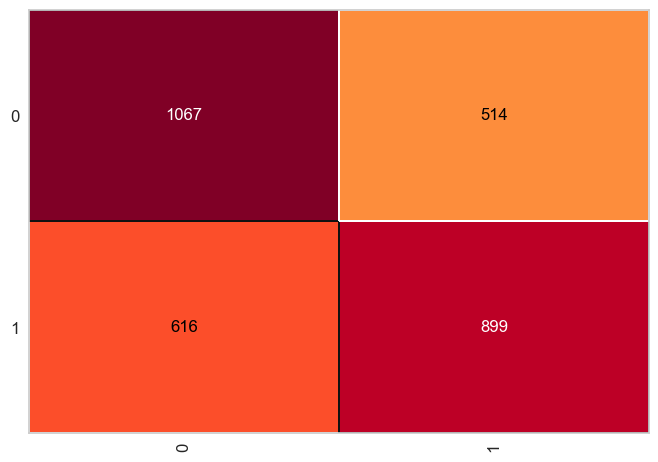

In [76]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

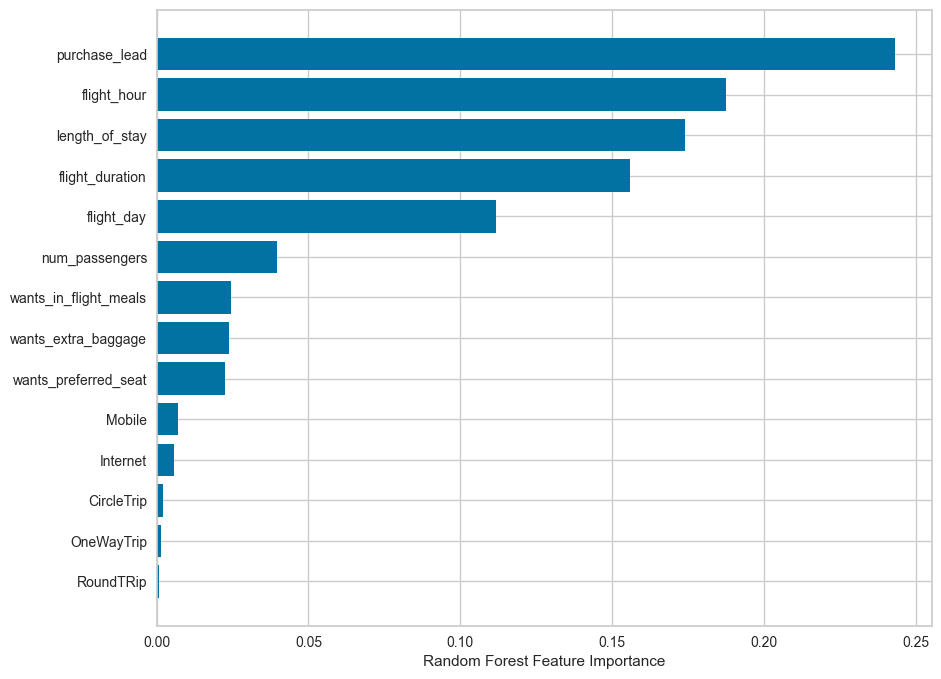

In [77]:
plt.figure(figsize=(10,8))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")